# Filter introduction

https://krischer.github.io/seismo_live_build/html/Signal%20Processing/filter_basics_wrapper.html

## Introduction

In this notebook we will learn how to filter data in the frequency domain. For that we need the basic concept of the fourier transform and the time-frequency concept ([Fourier-Transformation](3.0_Fourier_Transform_Introduction.ipynb)).

'Of poles and zeros' by Frank Scherbaum:

      Filters or systems are, in the most general sense, devices (in the physical world) or algorithms (in the mathematical world) which act on some input signal to produce a - possibly different - output signal

The idea behind frequency-filtering is to manipulate your signal in the frequency domain.
The concept in more detail, first transform your data into the frequency-domain, next supress or enhance certain frequencies, finally apply the inverse-fourier transform. In the end, the signal is filtered. 

The modification of a signal is done by multiplying a certain response spectrum with the spectrum of your signal in the frequency-domain. The response spectrum of the filter is defined by a single or multiple corner frequencies.

[More](https://en.wikipedia.org/wiki/Filter_(signal_processing))

Possible applications:
- waveform filtering
- noise removal
- instrument correction

Is used/needed for the following lectures:
- Everything with seismology and waveforms


## Table of Contents
- [Filtering](#Filtering)
- [Bandpass and -stop](#Bandpass)
- [Summary](#Summary)

<a id='Filtering'></a> 
# Filtering
Here we use filter that have only one single corner frequency.

In [1]:
import numpy as num
import matplotlib.pyplot as plt

# Comment for the creation of this notebook
## Which type to use? 
[signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html#scipy.signal.lfilter), one-dimensional IIR/FIR filter 

or [signal.filtfilt](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html#scipy.signal.filtfilt), forward and backwards filtering, but zero-phase

Maybe this can also be taught at the end to show to carefully chose the filter-type? Causal vs non-causal?

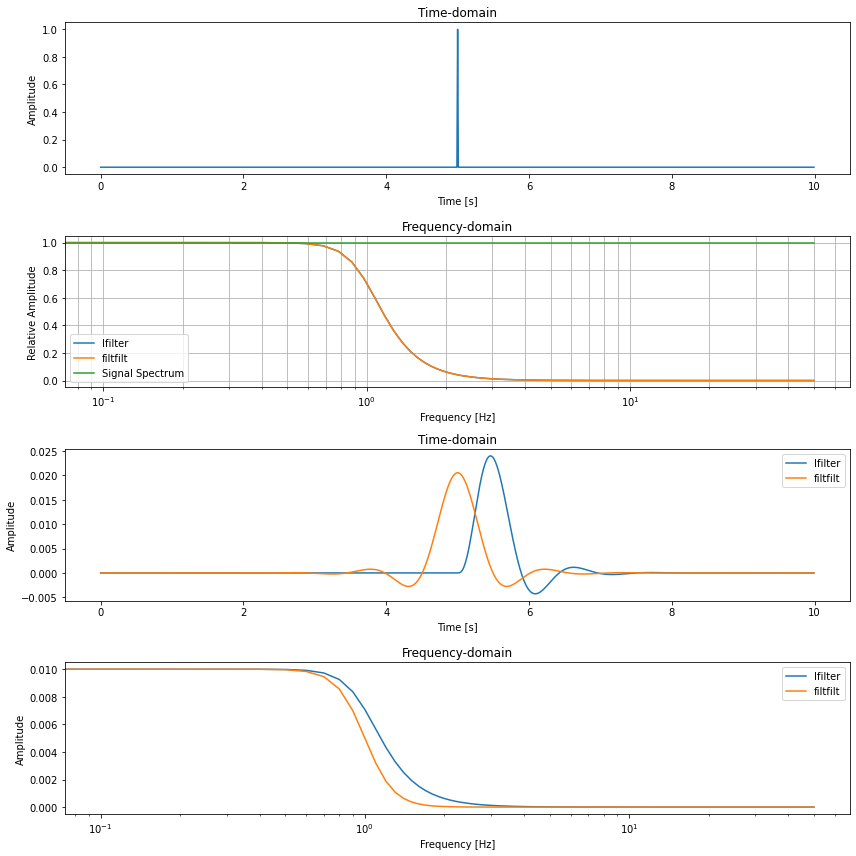

In [38]:
df = 100  # Sampling frequency [Hz]
timelen = 10  # Data length [s]
dt = 1 / df  # Sampling interval [s]

numsamples = timelen * df
x = num.arange(numsamples) / df

fr1 = 1.
fr2 = 10.
fr3 = 5.
ydata = num.zeros(numsamples)
ydata[500] = 1
# ydata = num.sin(2 * num.pi * fr1 * x)
# ydata += num.sin(2 * num.pi * fr2 * x)
# ydata += num.sin(2 * num.pi * fr3 * x)

amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(len(x), d=dt)


## Filter requirements
filterfreq = 1 # Frequency of the filter
order = 4 # Order of the filter - 'stepness'

nyquist = df / 2. # Nyquist-frequency
ws = filterfreq / nyquist


#### Pyrocko
b1, a1 = signal.butter(order, ws, 'lowpass')
yfilt1 = signal.lfilter(b1, a1, ydata)
w1, h1 = signal.freqz(b1, a1, fs=df) # last argument just to optimize the display quality
amps_filt1 = abs(num.fft.rfft(yfilt1)) * dt
freqs_filt1 = num.fft.rfftfreq(len(yfilt1), d=dt)

# #### My Original Approach
b2, a2 = signal.butter(order, ws, 'lowpass')
yfilt2 = signal.filtfilt(b2, a2, ydata)
w2, h2 = signal.freqz(b2, a2, fs=df) # last argument just to optimize the display quality
amps_filt2 = abs(num.fft.rfft(yfilt2)) * dt
freqs_filt2 = num.fft.rfftfreq(len(yfilt2), d=dt)

# #### sklearn suggest approach
# sos3 = signal.butter(order, ws, 'lowpass', output='sos')
# yfilt3 = signal.sosfilt(sos3, ydata)
# w3, h3 = signal.sosfreqz(sos3, fs=df) # last argument just to optimize the display quality
# amps_filt3 = abs(num.fft.rfft(yfilt3)) * dt
# freqs_filt3 = num.fft.rfftfreq(len(yfilt3), d=dt)


## Plotting
plt.figure(figsize=(12,12))
ax = plt.subplot(4, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('Time-domain')

ax = plt.subplot(4, 1, 2)
ax.semilogx(w1, abs(h1) / max(abs(h1)), label='lfilter')
ax.semilogx(w2, abs(h2) / max(abs(h2)), label='filtfilt')
ax.semilogx(freqs, amps / max(amps), label='Signal Spectrum')
ax.grid(which='both', axis='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Relative Amplitude')
ax.set_title('Frequency-domain')
ax.legend()

ax = plt.subplot(4, 1, 3)
ax.plot(x, yfilt1, label='lfilter')
ax.plot(x, yfilt2, label='filtfilt')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('Time-domain')
ax.legend()


ax = plt.subplot(4, 1, 4)
ax.semilogx(freqs_filt1, amps_filt1, label='lfilter')
ax.semilogx(freqs_filt2, amps_filt2, label='filtfilt')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')
ax.set_title('Frequency-domain')
ax.legend()


plt.tight_layout()
plt.show()

Similar to the example for the Fourier Transform we need to define out time signal first. Here, we will directly start with multiple frequencies.

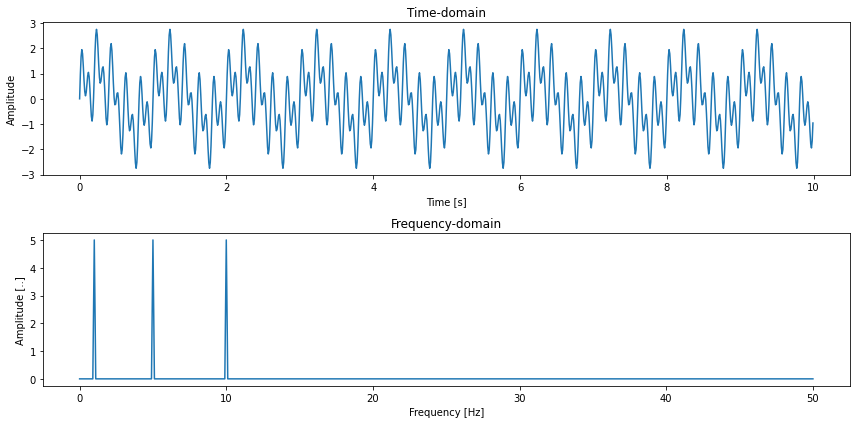

In [22]:
df = 100  # Sampling frequency [Hz]
timelen = 10  # Data length [s]
dt = 1 / df  # Sampling interval [s]

numsamples = timelen * df
x = num.arange(numsamples) / df

# Multiple frequencies
fr1 = 1.
fr2 = 10.
fr3 = 5
ydata = num.sin(2 * num.pi * fr1 * x)
ydata += num.sin(2 * num.pi * fr2 * x)
ydata += num.sin(2 * num.pi * fr3 * x)

amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(len(x), d=dt)

plt.figure(figsize=(12, 6))
ax = plt.subplot(2, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('Time-domain')

ax = plt.subplot(2, 1, 2)
ax.plot(freqs, amps)
#ax.semilogx(freqs, amps)
#ax.loglog(freqs, amps)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [..]')
ax.set_title('Frequency-domain')
plt.tight_layout()
plt.show()

Next, we define our filter. For that, we use the scipy-package with the [butter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter) function (short for [butterworth](https://en.wikipedia.org/wiki/Butterworth_filter)). This function needs an argument named order (we will see itfs effect later), something that corresponds to the corner frequency and a type of filter. To briefly introduce every of these arguments. First the order defines the stepness of the cut-off; the corner frequency is the frequency at which our signal is modified and depending on the type of filter either all frequencies higher (lowpass) or lower (highpass) than the corner frequencies are modified.

Before applying the filter, we take a look at the reponse of the filter we create and want to use later.

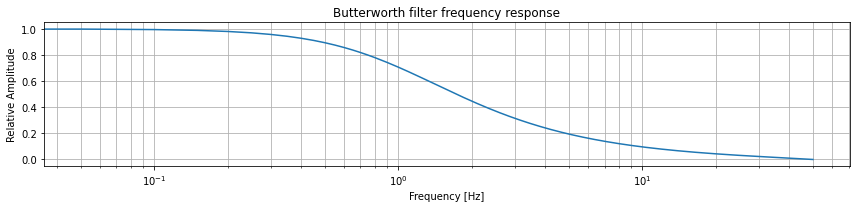

In [29]:
from scipy import signal

# Filter requirements
filterfreq = 1 # Frequency of the filter
order = 1 # Order of the filter - 'stepness'

nyquist = df / 2. # Nyquist-frequency
ws = filterfreq / nyquist
# filterfreq * 2.0*dt

b, a = signal.butter(order, ws, 'lowpass')
#b, a = sos = signal.butter(order, ws, 'highpass')
w, h = signal.freqz(b, a, int((1/filterfreq) * 1000), fs=df) # second last argument just to optimize the display quality

plt.figure(figsize=(12,3))
# plt.plot(w, abs(h) / max(abs(h)))
plt.semilogx(w, abs(h) / max(abs(h)))
plt.title('Butterworth filter frequency response')
plt.grid(which='both', axis='both')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Relative Amplitude')

plt.tight_layout()
plt.show()

If we combine our signal spectrum and the filter spectrum, we see which of our signal will be modified. Roughly speaking, the filter spectrum will be multiplied with the signal spectrum, therefore frequencies that have a small amplitude in the filter spectrum will be decreased or removed and high values either contained or amplified.

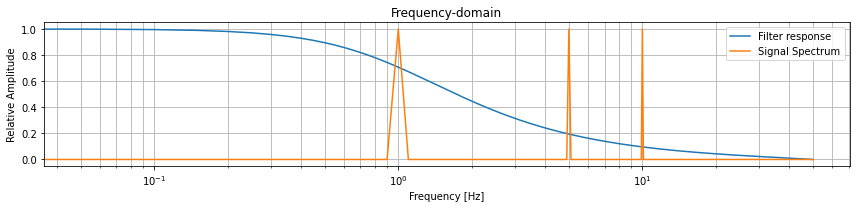

In [35]:
# Plotting filter response and data spectrum
plt.figure(figsize=(12,3))
plt.semilogx(w, abs(h) / max(abs(h)), label='Filter response')
plt.semilogx(freqs, amps / max(amps), label='Signal Spectrum')

plt.title('Frequency-domain')
plt.grid(which='both', axis='both')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Relative Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

After applying the filter, we have a look at the modified signal and also its 'new' spectrum.

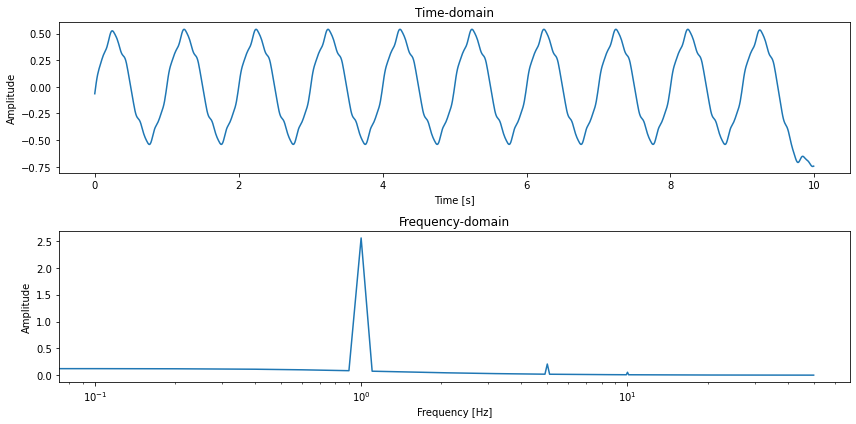

In [26]:
yfilt = signal.filtfilt(b, a, ydata)

amps_filt = abs(num.fft.rfft(yfilt)) * dt
freqs_filt = num.fft.rfftfreq(len(yfilt), d=dt)

plt.figure(figsize=(12, 6))
ax = plt.subplot(2, 1, 1)
ax.plot(x, yfilt)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('Time-domain')

ax = plt.subplot(2, 1, 2)
ax.semilogx(freqs_filt, amps_filt)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')
ax.set_title('Frequency-domain')
plt.tight_layout()
plt.show()

We see that the signal has changed, but there are still minore frequencies that disturb the "clean" signal. For that it can help to modify the order and/or the corner frequency.

### Tasks
- play with low- and highpas
- play with frequencies
- play with order

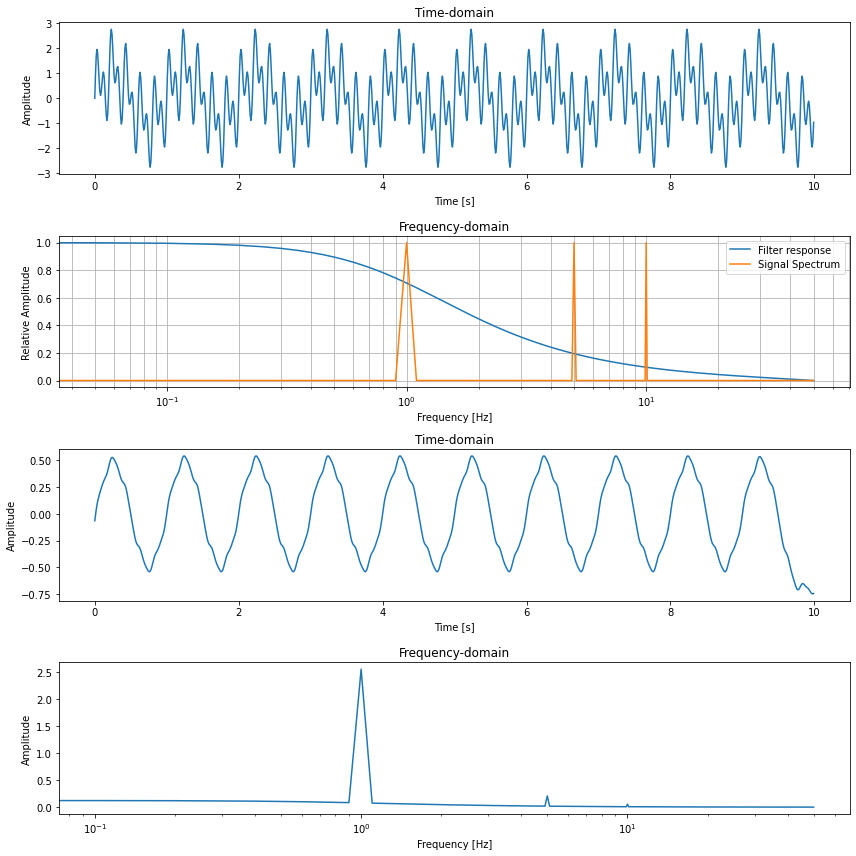

In [34]:
df = 100  # Sampling frequency [Hz]
timelen = 10  # Data length [s]
dt = 1 / df  # Sampling interval [s]

numsamples = timelen * df
x = num.arange(numsamples) / df

# Multiple frequencies
fr1 = 1.
fr2 = 10.
fr3 = 5.
ydata = num.sin(2 * num.pi * fr1 * x)
ydata += num.sin(2 * num.pi * fr2 * x)
ydata += num.sin(2 * num.pi * fr3 * x)


## Filter requirements
filterfreq = 1 # Frequency of the filter
order = 1 # Order of the filter - 'stepness'

nyquist = df / 2. # Nyquist-frequency
ws = filterfreq / nyquist


b, a = sos = signal.butter(order, ws, 'lowpass')
#b, a = sos = signal.butter(order, ws, 'highpass')
w, h = signal.freqz(b, a, int((1/filterfreq) * 1000), fs=df) # second last argument just to optimize the display quality
 

## FFT of original signal
amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(len(x), d=dt)

## Filtering
yfilt = signal.filtfilt(b, a, ydata)

## FFT of filtered signal
amps_filt = abs(num.fft.rfft(yfilt)) * dt
freqs_filt = num.fft.rfftfreq(len(yfilt), d=dt)


## Plotting
plt.figure(figsize=(12, 12))
ax = plt.subplot(4, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('Time-domain')

ax = plt.subplot(4, 1, 2)
ax.semilogx(w, abs(h) / max(abs(h)), label='Filter response')
ax.semilogx(freqs, amps / max(amps), label='Signal Spectrum')
ax.grid(which='both', axis='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Relative Amplitude')
ax.set_title('Frequency-domain')
ax.legend()

ax = plt.subplot(4, 1, 3)
ax.plot(x, yfilt)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('Time-domain')


ax = plt.subplot(4, 1, 4)
ax.semilogx(freqs_filt, amps_filt)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')
ax.set_title('Frequency-domain')

plt.tight_layout()
plt.show()

<a id='Bandpass'></a> 
# Bandpass and Bandstop
Bandpass and -stop filter combine low- and highpass filters. Therefore, they either supress a certain frequency range or supress everything except that range. Thus, they have two corner frequencies.

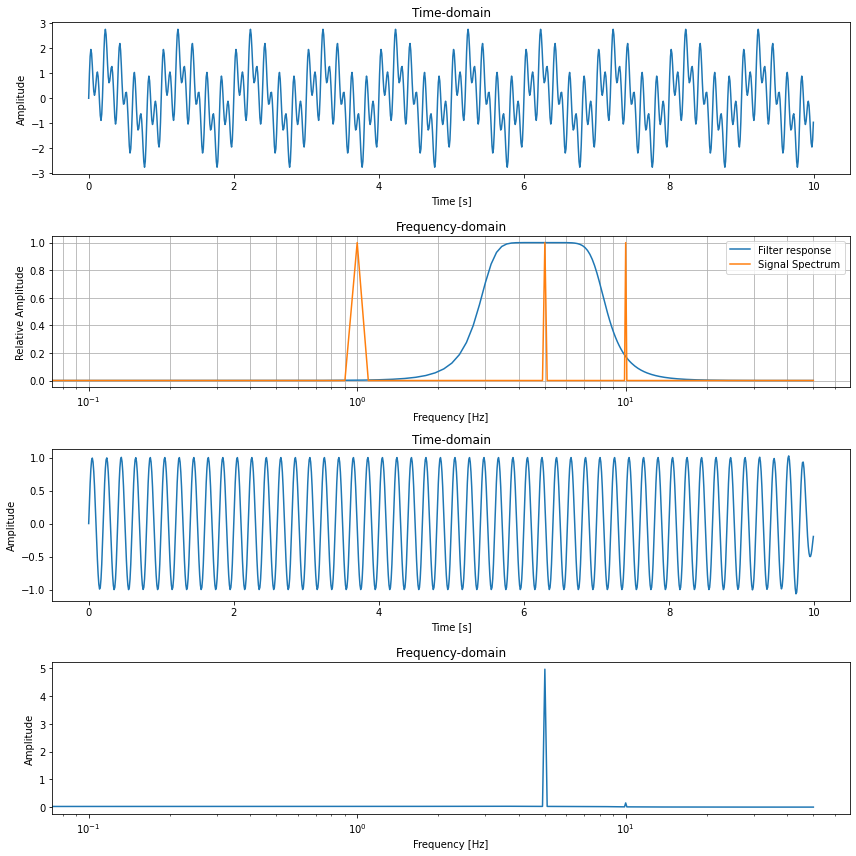

In [36]:
df = 100  # Sampling frequency [Hz]
timelen = 10  # Data length [s]
dt = 1 / df  # Sampling interval [s]

numsamples = timelen * df
x = num.arange(numsamples) / df

# Multiple frequencies
fr1 = 1.
fr2 = 10.
fr3 = 5
ydata = num.sin(2 * num.pi * fr1 * x) \
        + num.sin(2 * num.pi * fr2 * x) \
        + num.sin(2 * num.pi * fr3 * x)

amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(len(x), d=dt)


# Filter requirements.
filterfreq1 = 3
filterfreq2 = 8
order = 4

# One gotcha is that Wn is a fraction of the Nyquist frequency (half the sampling frequency).
# So if the sampling rate is 1000Hz and you want a cutoff of 250Hz, you should use Wn=0.5.
ws1 = filterfreq1 / nyquist
ws2 = filterfreq2 / nyquist

b, a = sos = signal.butter(order, [ws1, ws2], 'bandpass')
# b, a = sos = signal.butter(order, [ws1, ws2], 'bandstop')

w, h = signal.freqz(b, a, int((1/filterfreq1) * 1000), fs=df) # second last argument just to optimize the display quality

## FFT of original signal
amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(len(x), d=dt)

## Filtering
yfilt = signal.filtfilt(b, a, ydata)

## FFT of filtered signal
amps_filt = abs(num.fft.rfft(yfilt)) * dt
freqs_filt = num.fft.rfftfreq(len(yfilt), d=dt)


## Plotting
plt.figure(figsize=(12, 12))
ax = plt.subplot(4, 1, 1)
ax.plot(x, ydata)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('Time-domain')

ax = plt.subplot(4, 1, 2)
ax.semilogx(w, abs(h) / max(abs(h)), label='Filter response')
ax.semilogx(freqs, amps / max(amps), label='Signal Spectrum')
ax.grid(which='both', axis='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Relative Amplitude')
ax.set_title('Frequency-domain')
ax.legend()

ax = plt.subplot(4, 1, 3)
ax.plot(x, yfilt)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('Time-domain')


ax = plt.subplot(4, 1, 4)
ax.semilogx(freqs_filt, amps_filt)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')
ax.set_title('Frequency-domain')

plt.tight_layout()
plt.show()

<a id='Summary'></a> 
# Summary
We have learned
- how to filter a time signal
- how low- and highpass filter with one specific corner frequency and bandpass and -stop which two corner frequencies work